In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("NSE-TATA.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


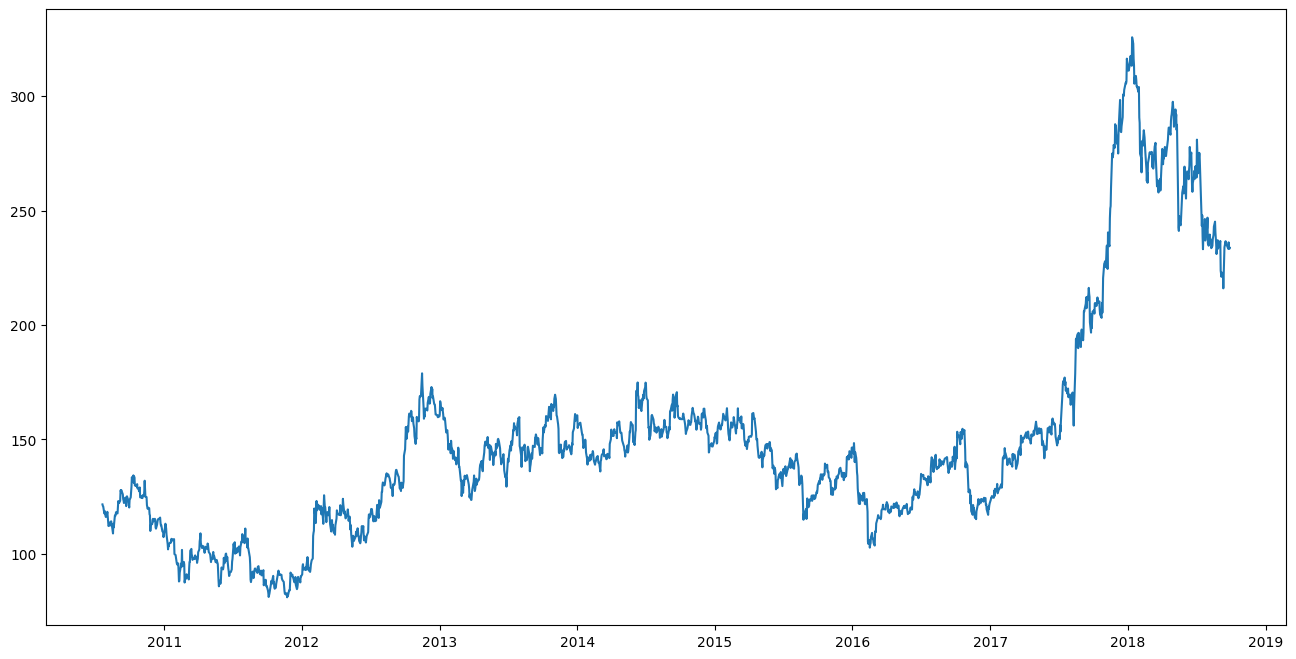

In [20]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')



In [11]:
data = df.sort_index(ascending=True, axis=0).reset_index(drop=True)
new_dataset = pd.DataFrame(index=range(0, len(data)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_dataset.loc[i, "Date"] = data.loc[i, 'Date']
    new_dataset.loc[i, "Close"] = data.loc[i, 'Close']


In [12]:
data = df.sort_index(ascending=True, axis=0).reset_index(drop=True)
new_dataset = data[['Date', 'Close']].copy()


In [14]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Assuming new_dataset contains 'Close' prices and has been preprocessed
# Step 1: Scale the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_dataset['Close'].values.reshape(-1, 1))

# Step 2: Create training data using the first portion of the dataset
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]

x_train_data = []
y_train_data = []

for i in range(60, len(train_data)):
    x_train_data.append(train_data[i-60:i, 0])
    y_train_data.append(train_data[i, 0])

x_train_data = np.array(x_train_data)
y_train_data = np.array(y_train_data)

# Step 3: Reshape x_train_data for LSTM [samples, time_steps, features]
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))

# Step 4: Build and train the model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)


C:\Users\ajaxj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1568/1568 - 29s - 18ms/step - loss: 8.5781e-04


In [7]:
lstm_model.save("saved_model.h5")

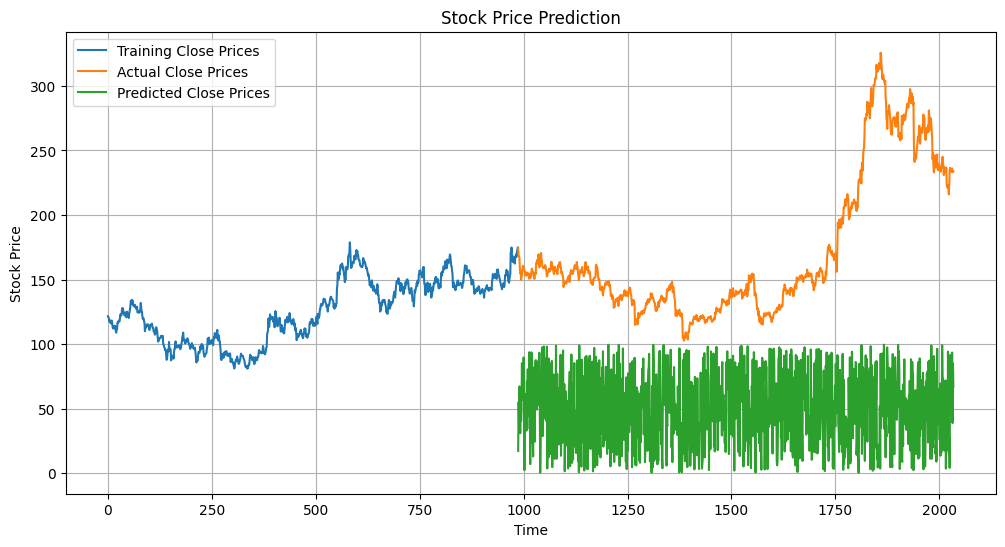

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Split the dataset
train_data = new_dataset[:987].copy()
valid_data = new_dataset[987:].copy()

# Dummy predictions (replace with model output)
predicted_closing_price = np.random.rand(len(valid_data)) * 100

# Assign predictions
valid_data.loc[:, 'Predictions'] = predicted_closing_price

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train_data["Close"], label='Training Close Prices')
plt.plot(valid_data["Close"], label='Actual Close Prices')
plt.plot(valid_data["Predictions"], label='Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.grid(True)
plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


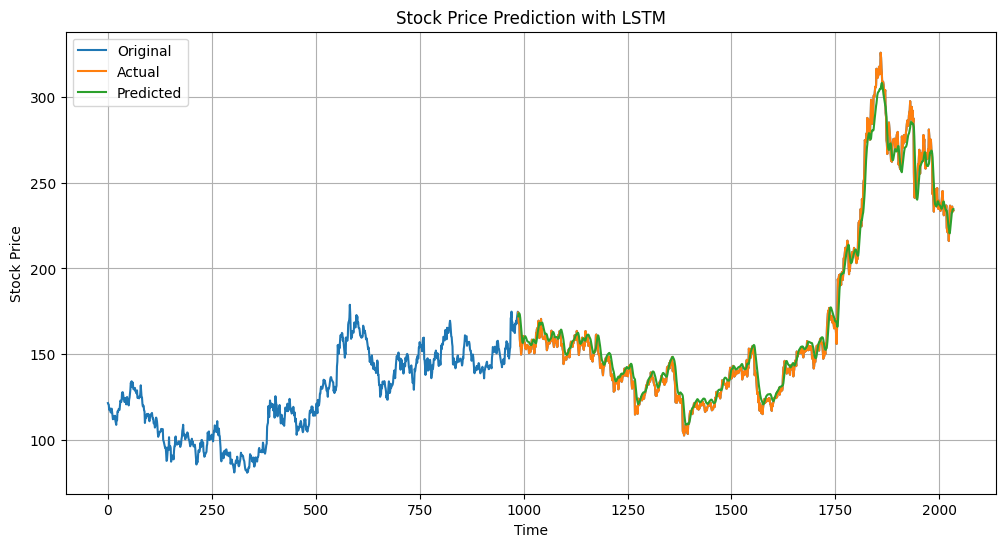

In [21]:
# Correct input data for validation
inputs_data = new_dataset['Close'][train_len - 60:].values  # Start 60 steps before validation
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.transform(inputs_data)

# Create validation input sequences
x_valid = []
for i in range(60, len(inputs_data)):
    x_valid.append(inputs_data[i-60:i, 0])

x_valid = np.array(x_valid)
x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))

# Predict
predicted_closing_price = lstm_model.predict(x_valid)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

# Adjust valid_data_plot to match predictions
valid_data_plot = new_dataset[train_len:].copy()
valid_data_plot = valid_data_plot.iloc[:len(predicted_closing_price)]  # Match lengths
valid_data_plot['Predictions'] = predicted_closing_price

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(new_dataset["Close"], label="Original")
plt.plot(valid_data_plot["Close"], label="Actual")
plt.plot(valid_data_plot["Predictions"], label="Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction with LSTM")
plt.legend()
plt.grid(True)
plt.show()
